## Semester 1 Project Submission

Please fill out:
* Student name: Sage Reagan, Neil Dilawari, Mahan Abbasian, Daniel Perez
* Instructor name: Charlie Rice, Lera Tsayukova



## Importing Python libraries

In [ ]:
# In this cell we import the libraries needed for our analysis
# pandas for data frame manipulation and import
# sqlite3 for database connection, import and manipulation
# numpy for array-wise operations
# plt and sns for plotting data or data frames

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Importing csv / tsv files

In this step, we will import data using the pandas library.
For that, there are two alternatives to import data:
1. bomDF = pd.read_csv("zippedData/bom.movie_gross.csv.gz", encoding="unicode_escape") --> for compressed files
2. bomDF = pd.read_csv("zippedData/bom.movie_gross.csv") --> for uncompressed (raw) files

In [34]:
# DataFrame from Box Office Mojo dataset
bomDF = pd.read_csv("zippedData/bom.movie_gross.csv.gz",encoding="unicode_escape")

In [35]:
print(bomDF.shape)

(3387, 5)


In [36]:
bomDF.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


## Importing SQL datset

Here, we import data from IMDB's SQLite database using sqlite3 library.

In [37]:
# DataFrame from IMDB dataset
conn = sqlite3.connect('zippedData/im.db')

In [38]:
movie_basicsDF = pd.read_sql("select * from movie_basics", con=conn)
movie_basicsDF.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [39]:
movie_ratingsDF = pd.read_sql("select * from movie_ratings", con=conn)
movie_ratingsDF.head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


## Daniel's Section: Relationship between genre and average rates/revenues

### a. Does a movie's genre have an impact in mean average rates?

- Step 1. Merging "movie_basics" and "movie_ratings" SQL tables

In [40]:
q = pd.read_sql("""

SELECT *
FROM movie_basics b
INNER JOIN movie_ratings r
ON b.movie_id = r.movie_id

;
""", con=conn)
q.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


- Step 2. Deleting rows with NAN values.

In [41]:
q['genres'].isna().sum()

804

In [42]:
q.dropna(subset=['genres'], inplace=True)

In [43]:
q['genres'].isna().sum()

0

- Step 3. Creating a subset with 10 items, with the highest average ratings. Then, plot the results.

In [44]:
qmaxr= q.groupby('genres',  as_index=False).mean().nlargest(5, 'averagerating')
qmaxr

,genres,start_year,runtime_minutes,averagerating,numvotes
449,"Comedy,Documentary,Fantasy",2015.0,70.0,9.4,5.0
633,"Documentary,Family,Musical",2017.0,59.0,9.3,19.0
851,"History,Sport",2016.0,NaN,9.2,5.0
837,Game-Show,2013.0,130.0,9.0,7.0
882,"Music,Mystery",2012.0,NaN,9.0,5.0


- Step 3. Creating a subset with 10 items, with the highest average ratings. Then, plot the results.

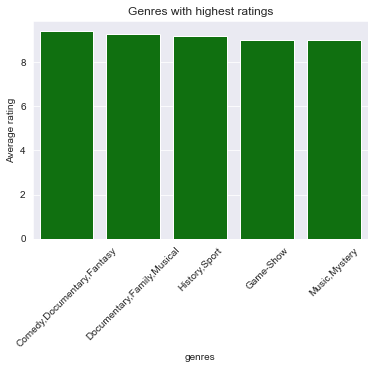

In [45]:
# Using seaborn library, we plot the 10 sample set from the dataset "q" with the highest average rating
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the average rating values.
sns.set_style("darkgrid")
sns.barplot(data=qmaxr, x= 'genres', y= 'averagerating', color= 'green')
plt.xticks(rotation=45);
plt.ylabel("Average rating");
plt.title("Genres with highest ratings");
plt.savefig("genres_high_ratings.png",
            bbox_inches ="tight",
            orientation ='landscape');

- Step 4. Creating a subset with 10 samples, with the lowest average ratings. Then, plot the results.

In [46]:
qminr = q.groupby('genres',  as_index=False).mean().nsmallest(5, 'averagerating')
qminr

,genres,start_year,runtime_minutes,averagerating,numvotes
527,"Comedy,Musical,Sport",2015.0,101.0,1.4,28.0
153,"Adult,Horror",2015.0,120.0,2.0,128.0
195,"Adventure,Crime,Romance",2011.0,86.0,2.3,9.0
850,"History,Sci-Fi,Thriller",2017.0,120.0,2.3,227.0
594,"Crime,Music",2018.0,94.0,2.4,88.0


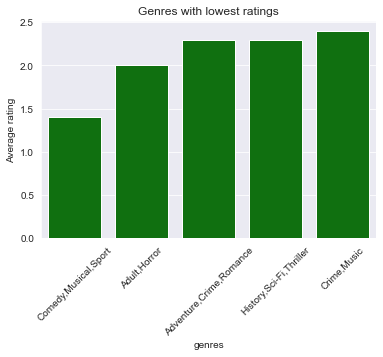

In [47]:
# Using seaborn library, we plot the 10 sample set from the dataset "q" with the lowest average rating.
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the average rating values.
sns.set_style("darkgrid")
sns.barplot(data=qminr, x="genres", y="averagerating",  color= 'green');
plt.xticks(rotation=45);
plt.ylabel("Average rating");
plt.title("Genres with lowest ratings");
plt.savefig("genres_low_ratings.png",
            bbox_inches ="tight",
            orientation ='landscape');

In [48]:
qmaxr['averagerating'].describe()

count    5.000000
mean     9.180000
std      0.178885
min      9.000000
25%      9.000000
50%      9.200000
75%      9.300000
max      9.400000
Name: averagerating, dtype: float64

In [49]:
qminr['averagerating'].describe()

count    5.000000
mean     2.080000
std      0.408656
min      1.400000
25%      2.000000
50%      2.300000
75%      2.300000
max      2.400000
Name: averagerating, dtype: float64

#### What can be conclued for question a?
- For the highest average rating movies, DOCUMENTARY is the most common genre within our 10 samples. Moreover, it is combined with other genres like Drama, Music or Sport.
- For the lowest average rating movies, DRAMA is the most common genre within our 10 samples. Moreover, it is combined with other genres like Adventure, Horror or Thriller.

### b. Does a movie's genre have an impact in mean gross revenues?

- Step 1. Explore where to merge the dataframes (Where? Movie titles)

In [50]:
# df.head() gives by default the first 5 rows from the dataframe
# df.tail() gives by default the last 5 rows from the dataframe

In [51]:
q.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43


In [52]:
bomDF.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


- Step 2. Change name in bomDF['title'] column to bomDF['primary_title']

In [53]:
# For the dataframe merging to be successful, we must change the column name in any of the two dataframes.
bomDF.rename(columns = {'title':'primary_title'}, inplace = True)

In [54]:
bomDF.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


- Step 3. Merge (type: inner) the "q" dataframe with "bomDF" dataframe on 'primary_title'

In [55]:
# the df.merge() function joins 2 dataframes by the inner type (default) on the column we want it to ('primary_title')
full_merge = bomDF.merge(q,on='primary_title')

In [56]:
full_merge.head()

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",tt0892791,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",tt1325004,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690


- Step 4. Change full_merge['foreign_gross'] to float64, retire NaN values and then create a new column where domestic and foreign gross are summed.

In [57]:
print(full_merge['domestic_gross'].dtypes)
print(full_merge['foreign_gross'].dtypes)

float64
object


In [58]:
full_merge['foreign_gross'] = full_merge['foreign_gross'].replace(',','', regex=True)

In [59]:
full_merge['foreign_gross'] = full_merge['foreign_gross'].astype(float)

In [60]:
full_merge['foreign_gross'].isna().sum()

1195

In [61]:
full_merge.dropna(subset=['foreign_gross'], inplace=True)

In [62]:
full_merge['foreign_gross'].isna().sum()

0

In [63]:
print(full_merge['domestic_gross'].dtypes)
print(full_merge['foreign_gross'].dtypes)

float64
float64


In [64]:
full_merge['global_sum'] = full_merge['domestic_gross'] + full_merge['foreign_gross']

In [65]:
full_merge['global_sum'] = full_merge['global_sum'].astype(float)

In [66]:
full_merge.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,global_sum
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,8.283000e+08


- Step 5. Create a subset with 10 samples, with the highest global gross (sum of domestic and foreign).

In [67]:
full_merge_max = full_merge.groupby('genres',  as_index=False).mean().nlargest(5, 'global_sum')
full_merge_max

,genres,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,global_sum
88,"Adventure,Drama,Sport",4.007000e+08,8.757000e+08,2013.000000,2010.000000,93.000000,6.200000,62311.000000,1.276400e+09
193,"Documentary,Drama,Sport",4.126000e+08,4.093000e+08,2017.000000,2016.000000,75.000000,6.900000,13.000000,8.219000e+08
261,Sci-Fi,4.126000e+08,4.093000e+08,2017.000000,2014.000000,60.000000,4.200000,20.000000,8.219000e+08
93,"Adventure,Fantasy",1.929000e+08,5.111333e+08,2013.333333,2013.333333,139.666667,7.166667,375770.333333,7.040333e+08
243,"Fantasy,Romance",2.005215e+08,4.585000e+08,2012.500000,2011.000000,107.000000,6.400000,2866.000000,6.590215e+08


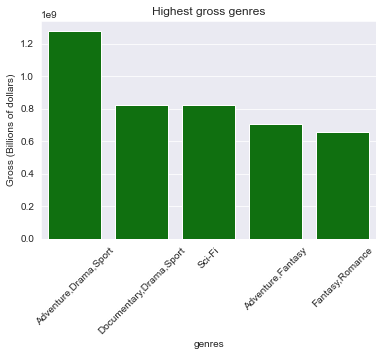

In [68]:
# Using seaborn library, we plot the 50 sample set from the dataset "full_merge" with the highest revenues
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the revenues values.
sns.set_style("darkgrid")
sns.barplot(data=full_merge_max, x="genres", y="global_sum", color='green');
plt.xticks(rotation=45);
plt.ylabel("Gross (Billions of dollars)");
plt.title("Highest gross genres");
plt.savefig("genres_high_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');

- Step 6. Create a subset with 10 samples, with the lowest global gross (sum of domestic and foreign).

In [69]:
full_merge_min = full_merge.groupby('genres',  as_index=False).mean().nsmallest(5, 'global_sum')
full_merge_min

,genres,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,global_sum
116,"Biography,Documentary,Drama",21600.0,105000.0,2011.0,2010.0,94.0,7.2,1566.0,126600.0
263,"Thriller,Western",21100.0,300000.0,2010.0,2010.0,95.0,6.4,7874.0,321100.0
53,"Action,Horror,Mystery",5500.0,364000.0,2012.0,2012.0,114.0,5.1,18206.0,369500.0
108,"Animation,Drama,Sci-Fi",138000.0,318000.0,2014.0,2013.0,122.0,6.5,15996.0,456000.0
166,"Comedy,Mystery,Romance",119000.0,421000.0,2011.0,2010.0,86.0,5.7,11858.0,540000.0


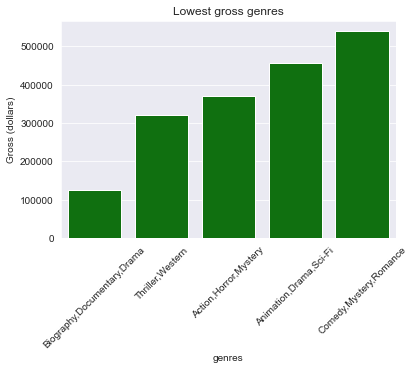

In [70]:
# Using seaborn library, we plot the 5 sample set from the dataset "full_merge" with the lowest revenues
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the revenues values.
sns.set_style("darkgrid")
sns.barplot(data=full_merge_min, x="genres", y="global_sum", color='green');
plt.xticks(rotation=45);
plt.ylabel("Gross (dollars)");
plt.title("Lowest gross genres");
plt.savefig("genres_low_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');

- Step 7. Obtain statistical information about the highest and lowest gross genres

In [71]:
full_merge_max['global_sum'].describe()

count    5.000000e+00
mean     8.566510e+08
std      2.454354e+08
min      6.590215e+08
25%      7.040333e+08
50%      8.219000e+08
75%      8.219000e+08
max      1.276400e+09
Name: global_sum, dtype: float64

In [72]:
full_merge_max['genres'].value_counts()

Adventure,Drama,Sport      1
Documentary,Drama,Sport    1
Sci-Fi                     1
Adventure,Fantasy          1
Fantasy,Romance            1
Name: genres, dtype: int64

In [73]:
full_merge_min['global_sum'].describe()

count         5.000000
mean     362640.000000
std      156253.137568
min      126600.000000
25%      321100.000000
50%      369500.000000
75%      456000.000000
max      540000.000000
Name: global_sum, dtype: float64

In [74]:
full_merge_min['genres'].value_counts()

Biography,Documentary,Drama    1
Thriller,Western               1
Action,Horror,Mystery          1
Animation,Drama,Sci-Fi         1
Comedy,Mystery,Romance         1
Name: genres, dtype: int64

- Step 8. Obtain statistics from our "population"

In [75]:
full_merge['global_sum'].describe()

count    1.803000e+03
mean     1.288335e+08
std      2.088373e+08
min      1.080000e+04
25%      1.000000e+07
50%      4.810000e+07
75%      1.489000e+08
max      1.405400e+09
Name: global_sum, dtype: float64

In [76]:
full_merge['genres'].value_counts()

Drama                         128
Comedy,Drama                   74
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           66
Drama,Romance                  62
                             ... 
Action,Comedy,Sport             1
Action,Comedy,Western           1
Drama,Romance,War               1
Adventure,Mystery,Sci-Fi        1
Fantasy,Thriller                1
Name: genres, Length: 264, dtype: int64

#### What can be conclued for question b?
- ADVENTURE has the highest-gross genre. Moreover, it is combined with other genres like action, Sci-Fi, Comedy or Thriller.

- DRAMA, COMEDY and HORROR stand as the lowest-gross genres.

### Conclusions for both questions
- There is an almost linear behaviour between genre and revenues. This might be due to a genre's acceptance between viewers, as not all genres are suitable for all audiences.
- On the other hand, the relationship bewteen genre and average ratings is not seen at all, although DOCUMENTARY and DRAMA are most common in high and low ratings, respectively.
- Interestingly, even though DOCUMENTARY is a well-rated genre, its revenues are no match against the ADVENTURE genre. On the other hand, DRAMA is a genre which is both terribly rated and low-revenued.

# Sage's Section
## Relationship between director and revenues

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)

import the budget data and clean

In [77]:
# read in movie budgets
budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [78]:
# clean movie budget data 
# clean budget data so that the numbers are integers rather than strings
budget["production_budget"] = budget["production_budget"].str.replace("$", "")
budget["domestic_gross"] = budget["domestic_gross"].str.replace("$", "")
budget["worldwide_gross"] = budget["worldwide_gross"].str.replace("$", "")

budget["production_budget"] = budget["production_budget"].str.replace(",", "")
budget["domestic_gross"] = budget["domestic_gross"].str.replace(",", "")
budget["worldwide_gross"] = budget["worldwide_gross"].str.replace(",", "")

budget["production_budget"] = budget["production_budget"].astype(int)
budget["domestic_gross"] = budget["domestic_gross"].astype(int)
budget["worldwide_gross"] = budget["worldwide_gross"].astype(float)

C:\Users\mabbasian\AppData\Local\Temp\ipykernel_30600\3197838212.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["production_budget"] = budget["production_budget"].str.replace("$", "")
C:\Users\mabbasian\AppData\Local\Temp\ipykernel_30600\3197838212.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["domestic_gross"] = budget["domestic_gross"].str.replace("$", "")
C:\Users\mabbasian\AppData\Local\Temp\ipykernel_30600\3197838212.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["worldwide_gross

In [79]:
# sort budget in descending order of worldwide_gross
budget = budget.sort_values(by = "worldwide_gross", ascending = False)

In [80]:
top_budget = budget.head()
top_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09


### The average number of movies each director has been a part of and a box plot showing the IQR of the number of movies:

start by creating a sql query that returns the number of movies each director has been in

In [81]:
num_of_movies_dir = """
SELECT 
    COUNT(movie_basics.primary_title),
    persons.primary_name
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE job LIKE "lead director" OR job LIKE "assistant director" OR job LIKE "co director" OR job LIKE "co-director"
GROUP BY primary_name
    HAVING COUNT(movie_basics.primary_title)
"""
num_of_movies_dir_df = pd.read_sql(num_of_movies_dir, conn)
num_of_movies_dir_df

,COUNT(movie_basics.primary_title),primary_name
0,2,A. Todd Smith
1,4,A.J. Detisch
2,2,A.M. Greene
3,2,Aaron Andrews
4,1,Aaron Bell
...,...,...
8094,3,Özlem Koza
8095,4,Özlem Sariyildiz
8096,5,Ülkü Oktay
8097,3,Þórdur Bragi Jónsson


determine average number of movies a director has been a part of

In [82]:
avg_movies_dir = num_of_movies_dir_df["COUNT(movie_basics.primary_title)"].mean()
avg_movies_dir

3.4520311149524634

create a box plot that shows the range of movies each director has been a part of

Text(0.5, 1.0, 'Box Plot showing Quartile Range of Number of Movies each Director has Been in')

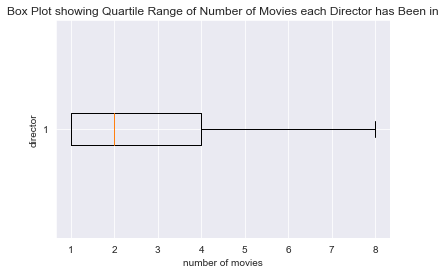

In [83]:
plt.boxplot(num_of_movies_dir_df["COUNT(movie_basics.primary_title)"], vert=False, showfliers=False)
plt.xlabel("number of movies")
plt.ylabel("director")
plt.title("Box Plot showing Quartile Range of Number of Movies each Director has Been in")

conclusion: it is acceptable to include directors that have only directed one movie because it is within range

### Directors of a movie and the worldwide gross

using sql query create a table that shows the directors of all the movies in the database including their job and the name of the movie

In [84]:
# create a SQL query that returns the primary name of the director and their movie
# then turn the query into a dataframe
# the SQL query should include only people whose job on the movie was "lead director", "assistant director",
# or "co director" and who are still alive today 
directors = """
SELECT 
    persons.primary_name,
    principals.job,
    movie_basics.primary_title
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_ratings
    USING(movie_id)
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE (job LIKE "lead director" OR job LIKE "assistant director" OR job LIKE "co director" OR job LIKE "co-director") 
        AND death_year IS NULL
"""

directors_df = pd.read_sql(directors, conn)

# clean table by dropping duplicates and na values
directors_df = directors_df.drop_duplicates()
directors_df = directors_df.dropna()
directors_df

,primary_name,job,primary_title
0,Toby Genkel,co-director,Thor: Legend of the Magical Hammer
10,Toby Genkel,co-director,All Creatures Big and Small
14,Tod Mesirow,co-director,The Wild Ponies of Chincoteague
15,Nick Read,co-director,Bolshoi Babylon
16,Michael Creighton Rogers,co-director,We Run Sh*t
...,...,...,...
12767,Valerie Girie,co-director,Ramesses II: The Great Journey
12769,Xiao Xiao,co-director,Turtle Rock
12770,Samuel Rich,co-director,Lost Kites
12771,Khian Bartlett,lead director,The Invisible Man


examine the budget table

In [85]:
# examine the budget table
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09


merge the budget dataframe and the directors dataframe, then create a table that shows only the directors and the budget of the movie

In [86]:
profit_and_directors = pd.merge(budget, directors_df, left_on='movie', right_on="primary_title")
profit_and_directors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_name,job,primary_title
0,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1.034728e+09,Kyle Balda,co-director,Despicable Me 3
1,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1.034728e+09,Pierre Coffin,co-director,Despicable Me 3
2,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1.034728e+09,Eric Guillon,co-director,Despicable Me 3
3,46,"Jun 17, 2016",Finding Dory,200000000,486295561,1.021215e+09,Angus MacLane,co-director,Finding Dory
4,46,"Jun 17, 2016",Finding Dory,200000000,486295561,1.021215e+09,Andrew Stanton,co-director,Finding Dory


In [87]:
# create a table with only directors and the worldwide gross of their movies
wwg_directors = profit_and_directors.loc[:,["primary_name", "worldwide_gross"]]
wwg_directors.head()

,primary_name,worldwide_gross
0,Kyle Balda,1.034728e+09
1,Pierre Coffin,1.034728e+09
2,Eric Guillon,1.034728e+09
3,Angus MacLane,1.021215e+09
4,Andrew Stanton,1.021215e+09


In [88]:
# remove any rows with values == 0
empty_index = wwg_directors[wwg_directors["worldwide_gross"] == 0].index
wwg_directors = wwg_directors.drop(empty_index)

In [89]:
# sort the list by descending
wwg_directors = wwg_directors.sort_values(by = "worldwide_gross", ascending=False)
pd.set_option('display.float_format', lambda x: '%.9f' % x)
pd.options.display.float_format = '{:,.1f}'.format
wwg_directors

,primary_name,worldwide_gross
0,Kyle Balda,"1,034,727,750.0"
2,Eric Guillon,"1,034,727,750.0"
1,Pierre Coffin,"1,034,727,750.0"
3,Angus MacLane,"1,021,215,193.0"
4,Andrew Stanton,"1,021,215,193.0"
...,...,...
79,Taedong Park,"360,898.0"
80,Steven Greenstreet,"100,280.0"
81,Reed Cowan,"100,280.0"
82,Kate Connor,"78,948.0"


create a boxplot that shows the range of the worldwide gross of each director 

Text(0, 0.5, 'movie')

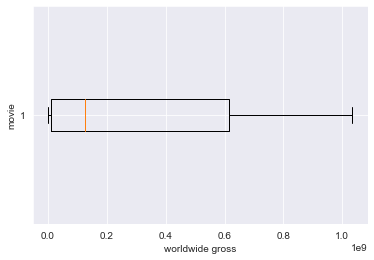

In [90]:
plt.boxplot(wwg_directors["worldwide_gross"], vert=False)
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel("worldwide gross")
plt.ylabel("movie")

create a scatterplot that shows the directors above the 75th quartile and the worldwide gross of each movie

Text(0.5, 1.0, 'directors and the average worldwide gross of the movies they have directed')

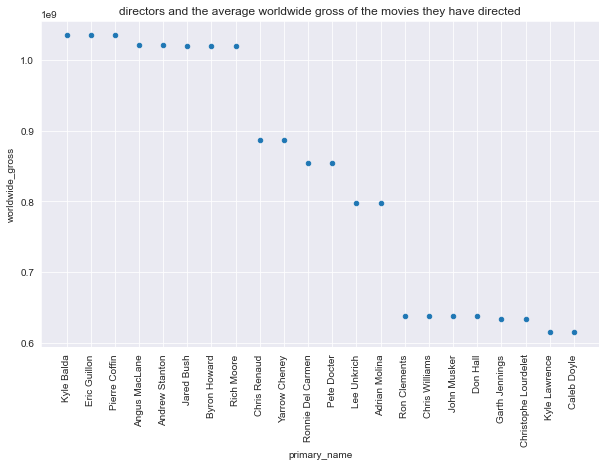

In [91]:
# create a scatter plot showing that there is a correlation between director and worldwide gross
directors_above_75Q = wwg_directors[wwg_directors["worldwide_gross"] >= 600000000]
plt.rcParams["figure.figsize"] = (10,6)
directors_above_75Q.plot(x = "primary_name", y = "worldwide_gross", kind = "scatter")
plt.xticks(rotation='vertical')
plt.title("directors and the average worldwide gross of the movies they have directed")

create a bar graph that shows the top directors above the 75th quartile with the highest grossing movies

Text(0.5, 1.0, 'Directors with Worldwide Gross Above the 75th Quartile')

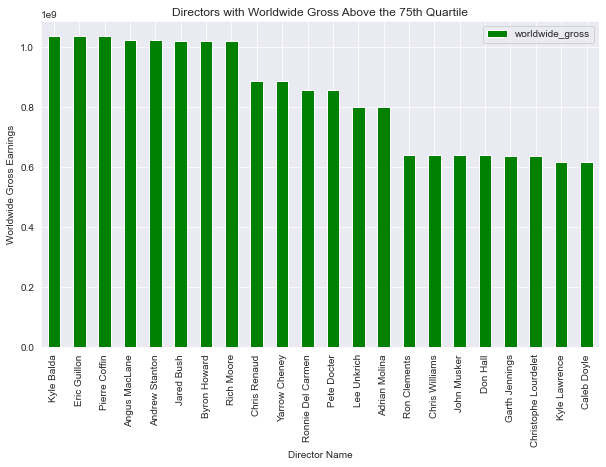

In [92]:
plt.rcParams["figure.figsize"] = (10,6)
directors_above_75Q.plot(x = "primary_name", y = "worldwide_gross", kind = "bar", color='green')
plt.ylabel("Worldwide Gross Earnings")
plt.xlabel("Director Name")
plt.xticks(rotation='vertical')
plt.title("Directors with Worldwide Gross Above the 75th Quartile")

plot a bar graph that displays the top 5 directors based on worldwide gross

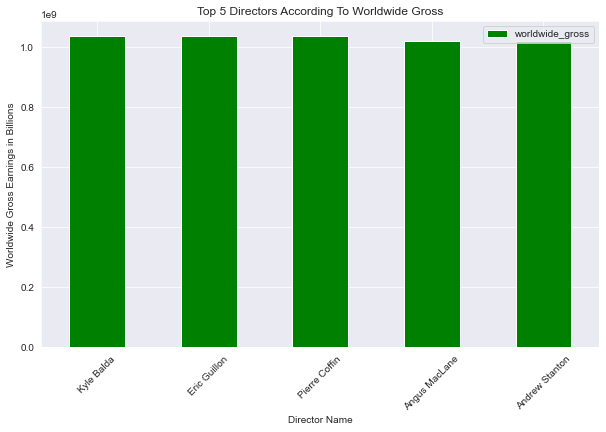

In [93]:
top_5_dir = wwg_directors.head(5)
plt.rcParams["figure.figsize"] = (10,6)
top_5_dir.plot(x = "primary_name", y = "worldwide_gross", kind = "bar", color='green')
plt.ylabel("Worldwide Gross Earnings in Billions")
plt.xlabel("Director Name")
plt.xticks(rotation=45)
plt.title("Top 5 Directors According To Worldwide Gross")
plt.savefig("top5dir")

### directors and movie ratings

create a sql query that returns the name of the director, the name of the movie they directed, and the rating of that movie

In [94]:
directors_and_ratings = """
SELECT 
    persons.primary_name,
    movie_ratings.averagerating
FROM persons
JOIN directors 
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE job LIKE "lead director" OR job LIKE "assistant director" OR job LIKE "co director" OR job LIKE "co-director"
GROUP BY primary_name
"""

directors_and_ratings_df = pd.read_sql(directors_and_ratings, conn)

# clean the data from the new table 
directors_and_ratings_df = directors_and_ratings_df.drop_duplicates()
directors_and_ratings_df = directors_and_ratings_df.dropna()

directors_and_ratings_df

,primary_name,averagerating
0,A. Todd Smith,8.2
1,A.J. Detisch,6.9
2,A.M. Greene,7.2
3,Aaron Bishop,5.1
4,Aaron Cadieux,5.4
...,...,...
3523,Özgür Bakar,3.6
3524,Özlem Koza,6.6
3525,Özlem Sariyildiz,7.8
3526,Ülkü Oktay,6.0


In [95]:
# choosing not to remove rows with average rating of 0 incase that is the actual average rating
# view the attributes and ratings table in decsending order
directors_and_ratings_df = directors_and_ratings_df.sort_values("averagerating", ascending=False)
directors_and_ratings_df

,primary_name,averagerating
519,Casey Kauffman,9.6
106,Alessandro Cassigoli,9.6
1669,Josepmaria Anglès,9.5
390,Bharatha Hettiarachchi,9.5
1909,Lauren Ross,9.5
...,...,...
943,Ely Buendia,1.6
2072,Marc Roussel,1.5
378,Bernard-Henri Lévy,1.5
3216,Takeo Urakami,1.0


create a box plot that shows the IQR of the averageratings of directors

Text(0.5, 1.0, 'Range of Average Ratings for Directors')

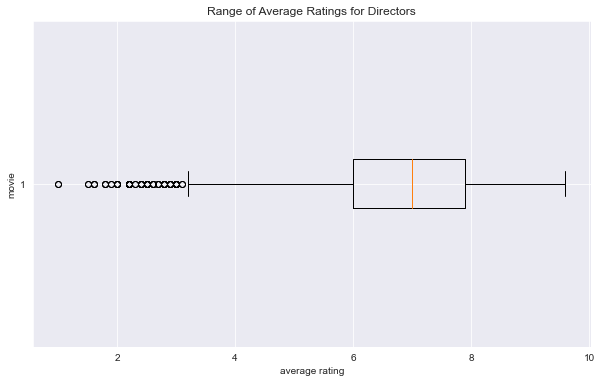

In [96]:
plt.boxplot(directors_and_ratings_df["averagerating"], vert=False)
plt.rcParams["figure.figsize"] = (5,3)
plt.xlabel("average rating")
plt.ylabel("movie")
plt.title("Range of Average Ratings for Directors")

create a scatter plot showing all directors with above average rating

Text(0.5, 1.0, 'directors and the average rating of their movies')

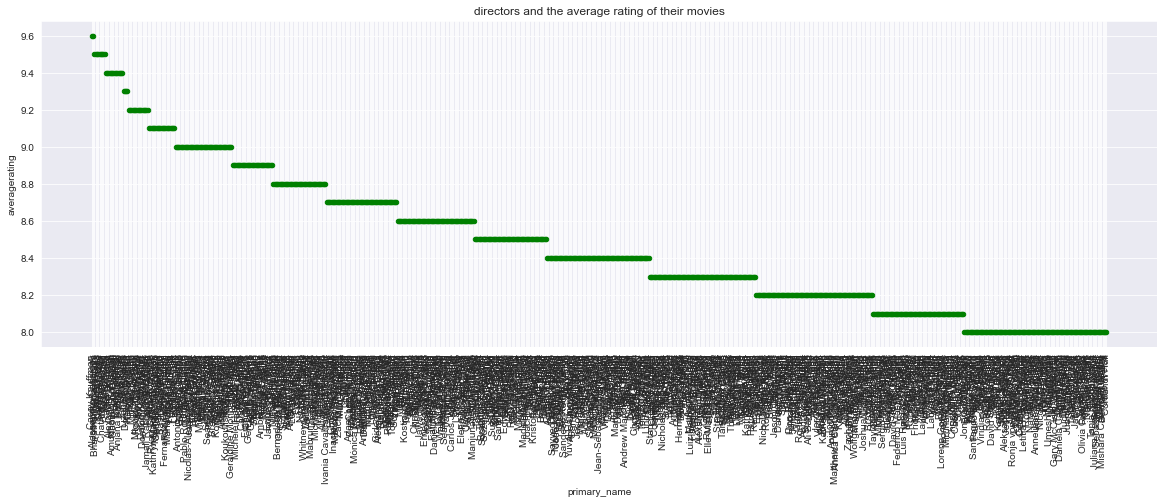

In [97]:
above_avg_rated_dir = directors_and_ratings_df[directors_and_ratings_df["averagerating"] >= 8]
plt.rcParams["figure.figsize"] = (20,6)
above_avg_rated_dir.plot(x = "primary_name", y = "averagerating", kind = "scatter", color='green')
plt.xticks(rotation='vertical')
plt.title("directors and the average rating of their movies")

still too many directors to choose from, we will create another box plot that graphs the IQR of the directors in the 75th quartile to maximum range

Text(0.5, 1.0, 'Range of Average Ratings for Directors')

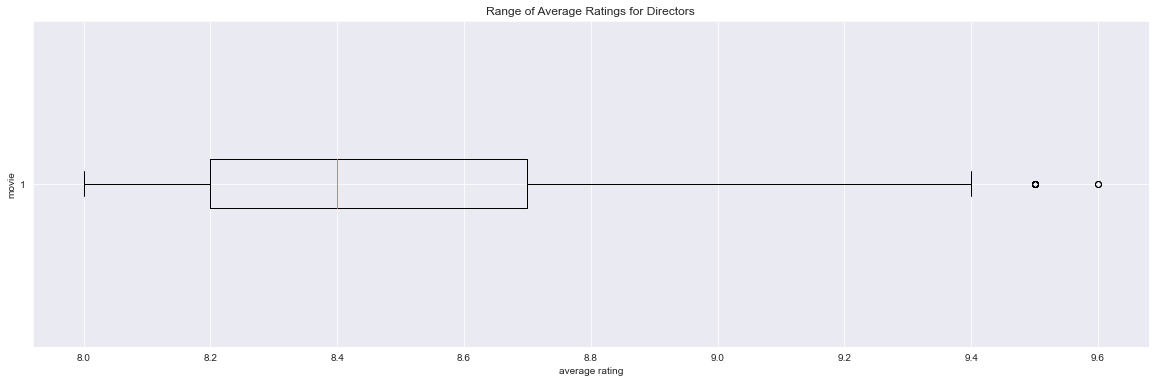

In [98]:
plt.boxplot(above_avg_rated_dir["averagerating"], vert=False)
plt.rcParams["figure.figsize"] = (5,1)
plt.xlabel("average rating")
plt.ylabel("movie")
plt.title("Range of Average Ratings for Directors")

create a bar graph that shows all the directors that are above the maximum

Text(0.5, 0, 'Director Name')

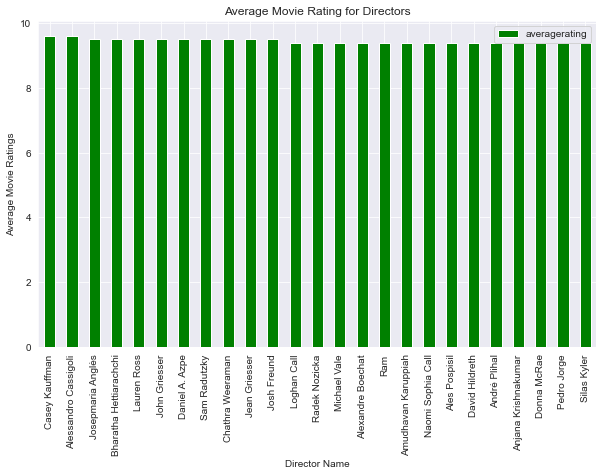

In [99]:
# create a bar graph showing the top 50 directors with the highest grossing movies
very_best_directors = above_avg_rated_dir[above_avg_rated_dir["averagerating"] >= 9.4]
plt.rcParams["figure.figsize"] = (10,6)
very_best_directors.plot(x = "primary_name", y = "averagerating", kind = "bar", color='green')
plt.title("Average Movie Rating for Directors")
plt.ylabel("Average Movie Ratings")
plt.xlabel("Director Name")
#plt.xticks(rotation='horizontal')
#plt.yticks()

# Neil's Section
## Relationship between ratings and runtime

### Does a movie's runtime affect the rating it recieves?

- Step 1. JOIN movie_basics to movie_ratings table

In [100]:
pd.read_sql("""
SELECT *
FROM movie_basics
    JOIN movie_ratings
        USING (movie_id)
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


- Step 2. Aggregate the AVG of runtime_minutes, show only non-null values, and since numvotes had a range from 5 to 90,000 we want to set a minimum baseline of 100 so results are not skewed or biased

In [101]:
pd.read_sql("""
SELECT averagerating, AVG(runtime_minutes) AS "Average Runtime"
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes >= 100
GROUP BY averagerating
ORDER BY averagerating DESC
;
""", conn)

,averagerating,Average Runtime
0,9.9,138.0
1,9.7,142.0
2,9.6,119.8
3,9.5,89.7
4,9.4,92.4
...,...,...
84,1.4,85.1
85,1.3,92.8
86,1.2,84.2
87,1.1,92.7


- Step 3: Assign these results to a variable named Correlation_Data

In [102]:
Correlation_Data = pd.read_sql("""
SELECT averagerating, AVG(runtime_minutes) AS "Average Runtime"
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes >= 100
GROUP BY averagerating
ORDER BY averagerating DESC
;
""", conn)
Correlation_Data

,averagerating,Average Runtime
0,9.9,138.0
1,9.7,142.0
2,9.6,119.8
3,9.5,89.7
4,9.4,92.4
...,...,...
84,1.4,85.1
85,1.3,92.8
86,1.2,84.2
87,1.1,92.7


- Step 5: Conduct two-tailed t-test for hypothesis testing
### Use 115.0 minutes as a divider between short and long movies
### Null Hypothesis: The runtime of a movie has no influence on the rating it recieves
### Alternative Hypothesis: The runtime of a movie does have an influence on the rating it recieves
### Set alpha = 0.05

In [103]:
long_movies = Correlation_Data[Correlation_Data["Average Runtime"]>=115.0]["averagerating"]
short_movies = Correlation_Data[Correlation_Data["Average Runtime"]<115.0]["averagerating"]

In [104]:
alpha = 0.05
stats.ttest_ind(long_movies, short_movies)

Ttest_indResult(statistic=6.082044445100752, pvalue=3.085579539579667e-08)

### Since our p value is less than alpha of 0.05, we have enough evidence to reject the null hypothesis

- Step 6: Display the results of the SQL Table into a scatter plot visualization

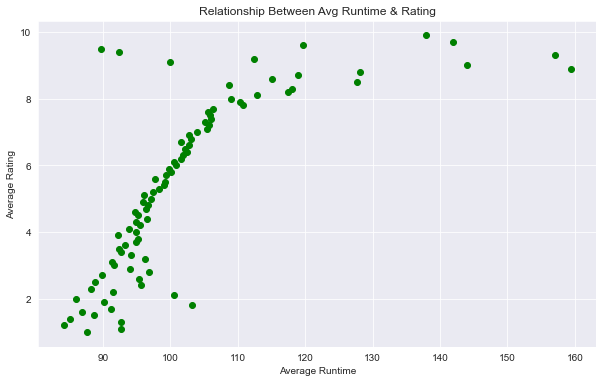

In [105]:
plt.scatter(Correlation_Data['Average Runtime'], Correlation_Data['averagerating'], color = 'green')
plt.xlabel('Average Runtime')
plt.ylabel('Average Rating')
plt.title('Relationship Between Avg Runtime & Rating')
plt.show()

# Mahan's Section
## Relationship between 

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)

- this is for when it comes to genres split into different categoreies

- in adition some failed machine learning was attemped in my personal notebook

In [20]:
tnDF = pd.read_csv("zippedData/tn.movie_budgets.csv.gz",encoding="unicode_escape")
tnDF.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:

tnDF["production_budget"] = tnDF["production_budget"].str.replace("$", "")
tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace("$", "")
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].str.replace("$", "")



tnDF["production_budget"] = tnDF["production_budget"].str.replace(",", "")
tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace(",", "")
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].str.replace(",", "")



tnDF["production_budget"] = tnDF["production_budget"].astype(int)
tnDF["domestic_gross"] = tnDF["domestic_gross"].astype(int)
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].astype(float)

C:\Users\mabbasian\AppData\Local\Temp\ipykernel_30600\1434819792.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tnDF["production_budget"] = tnDF["production_budget"].str.replace("$", "")
C:\Users\mabbasian\AppData\Local\Temp\ipykernel_30600\1434819792.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace("$", "")
C:\Users\mabbasian\AppData\Local\Temp\ipykernel_30600\1434819792.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tnDF["worldwide_gross"] = tnDF[

In [22]:
movie_basicsDF = pd.read_sql("select * from movie_basics", con=conn)
movie_basicsDF.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [23]:
tn_basics = pd.merge(tnDF, movie_basicsDF, left_on='movie', right_on='primary_title')
tn_basics.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [24]:
tn_basics.dropna(inplace=True)

In [25]:
tn_basics["genre1"] = tn_basics['genres'].map(lambda x : x.split(',')[0])
tn_basics['genre2'] = tn_basics['genres'].map(lambda x : x.split(',')[1] if len(x.split(',')) > 1 else 'None')
tn_basics['genre3'] = tn_basics['genres'].map(lambda x :  x.split(',')[2] if len(x.split(',')) > 2  else 'None')

In [30]:
newdf = tn_basics[['movie', 'worldwide_gross', 'primary_title', "genre1","genre2","genre3"]]

In [32]:
newdf = newdf.sort_values(by='worldwide_gross', ascending=False)
newdf

,movie,worldwide_gross,primary_title,genre1,genre2,genre3
0,Avatar,2.776345e+09,Avatar,Horror,None,None
43,Titanic,2.208208e+09,Titanic,Family,None,None
4,Avengers: Infinity War,2.048134e+09,Avengers: Infinity War,Action,Adventure,Sci-Fi
25,Jurassic World,1.648855e+09,Jurassic World,Action,Adventure,Sci-Fi
67,Furious 7,1.518723e+09,Furious 7,Action,Crime,Thriller
...,...,...,...,...,...,...
2950,Hansel & Gretel Get Baked,0.000000e+00,Hansel & Gretel Get Baked,Comedy,Horror,None
2951,Fugly,0.000000e+00,Fugly,Drama,Thriller,None
2952,Zipper,0.000000e+00,Zipper,Drama,Thriller,None
2953,The Final Girls,0.000000e+00,The Final Girls,Comedy,Drama,Fantasy


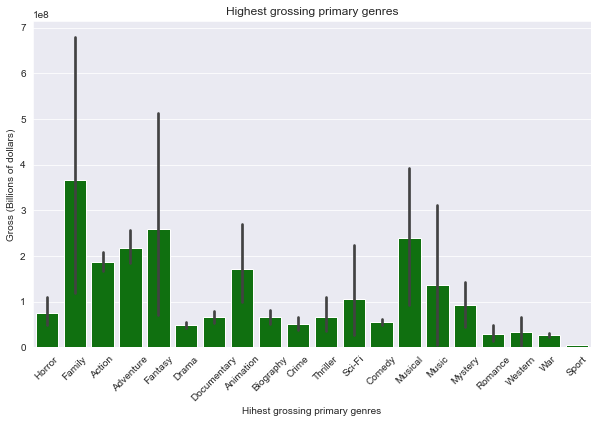

In [111]:
sns.set_style("darkgrid")
sns.barplot(data=newdf, x="genre1", y="worldwide_gross", color='green');
plt.xticks(rotation=45);
plt.xlabel("Hihest grossing primary genres")
plt.ylabel("Gross (Billions of dollars)");
plt.title("Highest grossing primary genres");
plt.savefig("genres_high_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');

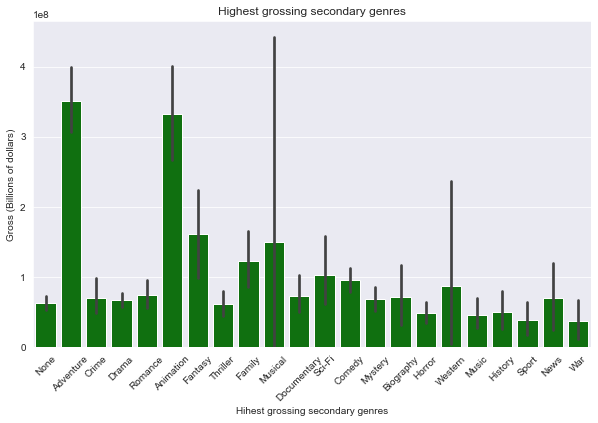

In [112]:
sns.set_style("darkgrid")
sns.barplot(data=newdf, x="genre2", y="worldwide_gross", color='green');
plt.xticks(rotation=45);
plt.xlabel("Hihest grossing secondary genres")
plt.ylabel("Gross (Billions of dollars)");
plt.title("Highest grossing secondary genres");
plt.savefig("genres_high_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');

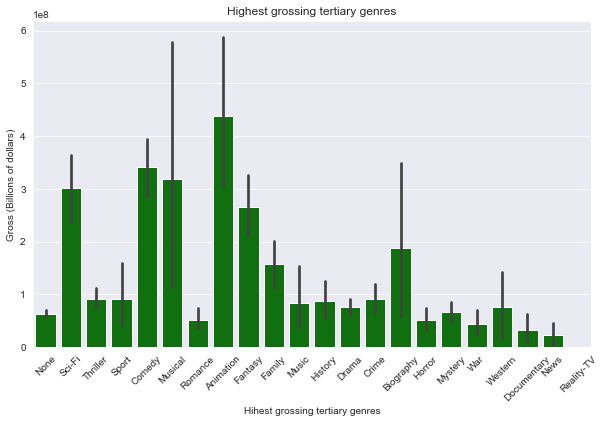

In [113]:
sns.set_style("darkgrid")
sns.barplot(data=newdf, x="genre3", y="worldwide_gross", color='green');
plt.xticks(rotation=45);
plt.xlabel("Hihest grossing tertiary genres")
plt.ylabel("Gross (Billions of dollars)");
plt.title("Highest grossing tertiary genres");
plt.savefig("genres_high_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');